# Hamming Window

The **Hamming window** is a popular windowing function used in FIR filter design and spectral analysis. It is similar to the Hann window but has better side-lobe attenuation.

It comes in two common forms:
- **Symmetric**: used for FIR filter design (ensures even symmetry).
- **Periodic**: used in spectral analysis (avoids discontinuities in STFT and DFT).

This notebook compares both versions in time and frequency domains.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
# Parameters
M = 64  # Window length
N = 2**int(np.ceil(np.log2(M * 16)))  # FFT size
dBCut = -100  # dB threshold
eps = np.finfo(float).eps

Modd = M % 2
Mo2 = (M - Modd) // 2

## Mathematical Formulation

The Hamming window is a raised cosine window defined as:

- **Symmetric**:
$$
w[n] = 0.54 - 0.46 \cos\left(\frac{2\pi n}{M-1}\right), \quad 0 \leq n < M
$$

- **Periodic**:
$$
w[n] = 0.54 - 0.46 \cos\left(\frac{2\pi n}{M}\right), \quad 0 \leq n < M
$$

The periodic version is typically used when the signal is assumed to repeat (e.g., in FFT-based analysis).


In [3]:
n_sym = np.arange(M)
whs = 0.54 - 0.46 * np.cos(2 * np.pi * n_sym / (M - 1))  # Symmetric Hamming

n_per = np.arange(M + 1)
whp = 0.54 - 0.46 * np.cos(2 * np.pi * n_per / M)  # Periodic Hamming
whp = whp[:-1]  # Trim to M samples


## Zero-Padding and Spectrum

We center the windows using a circular shift, zero-pad to `N` points, and compute the FFT. We then convert the magnitude to decibels, normalize to 0 dB, and clip to `dBCut`.


In [4]:
# Zero-padded buffers
whszp = np.concatenate([whs[Mo2:], np.zeros(N - M), whs[:Mo2]])
whpzp = np.concatenate([whp[Mo2:], np.zeros(N - M), whp[:Mo2]])

# FFT
Whszp = np.fft.fft(whszp)
Whpzp = np.fft.fft(whpzp)

# Magnitude in dB
magWhs_dB = 20 * np.log10(np.abs(Whszp) + eps)
magWhs_dB -= np.max(magWhs_dB)
magWhs_dB = np.maximum(magWhs_dB, dBCut)

magWhp_dB = 20 * np.log10(np.abs(Whpzp) + eps)
magWhp_dB -= np.max(magWhp_dB)
magWhp_dB = np.maximum(magWhp_dB, dBCut)


## Time and Frequency Domain Visualization

We plot both symmetric and periodic Hamming windows and their respective frequency responses to observe differences in tapering and spectral leakage.


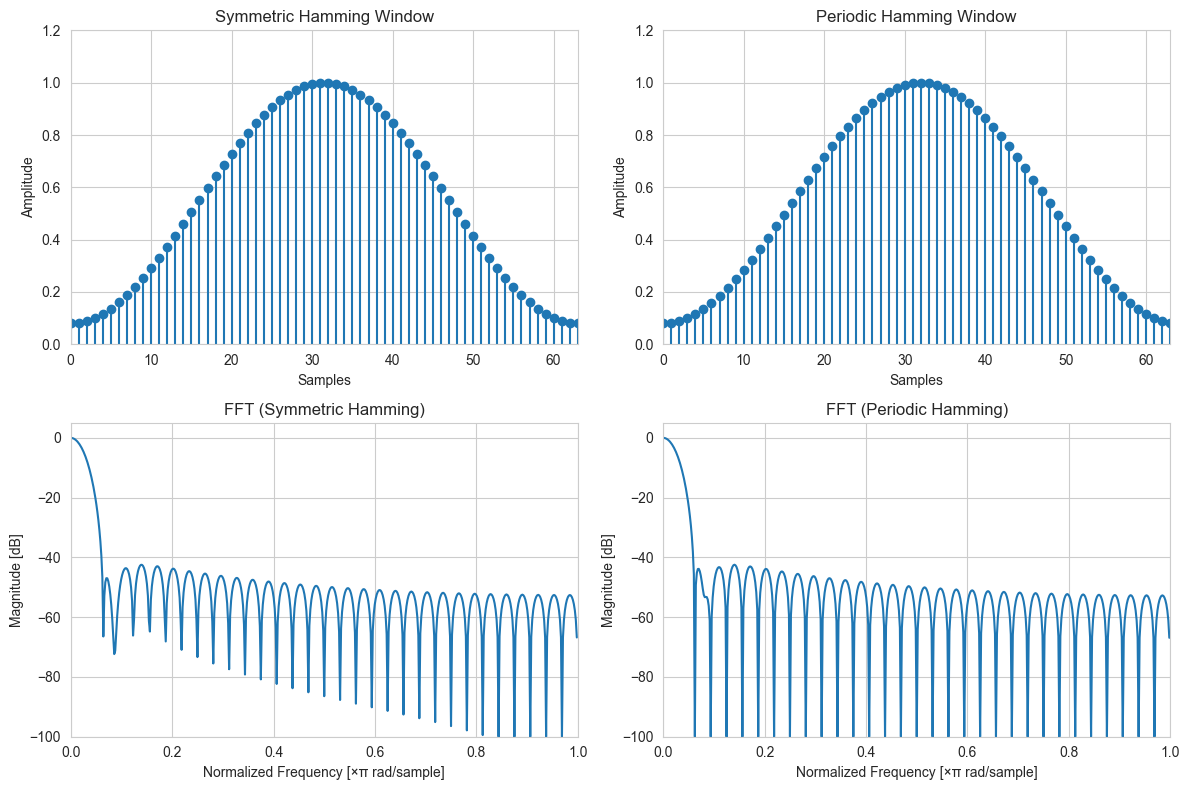

In [ ]:
nf = np.linspace(0, 2, N, endpoint=False)[:N//2]
n = np.arange(M)

plt.figure(figsize=(12, 8))

# Time-domain: symmetric
plt.subplot(2, 2, 1)
plt.stem(n, whs, basefmt=" ")
plt.title('Symmetric Hamming Window')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.xlim(0, M-1)
plt.ylim(0, 1.2)
plt.grid(True)

# Time-domain: periodic
plt.subplot(2, 2, 2)
plt.stem(n, whp, basefmt=" ")
plt.title('Periodic Hamming Window')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.xlim(0, M-1)
plt.ylim(0, 1.2)
plt.grid(True)

# Frequency-domain: symmetric
plt.subplot(2, 2, 3)
plt.plot(nf, magWhs_dB[:N//2])
plt.title('FFT (Symmetric Hamming)')
plt.xlabel(r'Normalized Frequency [$\pi$ rad/sample]')
plt.ylabel('Magnitude [dB]')
plt.xlim(0, 1)
plt.ylim(dBCut, 5)
plt.grid(True)

# Frequency-domain: periodic
plt.subplot(2, 2, 4)
plt.plot(nf, magWhp_dB[:N//2])
plt.title('FFT (Periodic Hamming)')
plt.xlabel(r'Normalized Frequency [$\pi$ rad/sample]')
plt.ylabel('Magnitude [dB]')
plt.xlim(0, 1)
plt.ylim(dBCut, 5)
plt.grid(True)

plt.tight_layout()
plt.show()
